In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Question 1:

Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate.

**- Create the XOR gate's truth table dataset.**

In [3]:
# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


**- Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.**

In [23]:
import numpy as np
# MCP Neuron
def mcp_neuron(x, w, b):
    return 1 if np.dot(x, w) + b > 0 else 0

# Single Layer Perceptron
def train_slp(X, y, learning_rate=0.1, epochs=1000):
    w = np.random.rand(2)
    b = np.random.rand()

    for _ in range(epochs):
        for i in range(len(X)):
            prediction = mcp_neuron(X[i], w, b)
            error = y[i] - prediction
            w += learning_rate * error * X[i]
            b += learning_rate * error

    return w, b

# Train and evaluate SLP
w_slp, b_slp = train_slp(X, y)
slp_predictions = [mcp_neuron(x, w_slp, b_slp) for x in X]

* Taking [1,1] as inputs

In [26]:
x_test = np.array([1, 1])
prediction_test = mcp_neuron(x_test, w_slp, b_slp)

print("\nTesting with all inputs as 1s:")
print("Input:", x_test)
print("Prediction:", prediction_test)



Testing with all inputs as 1s:
Input: [1 1]
Prediction: 0


* The SLP may not always predict 0 for [1, 1], but the core principle that
XOR is not linearly separable remains.

* Applying SLP to the XOR values

In [27]:
print("actual results :", y)

# Train and evaluate SLP
w_slp, b_slp = train_slp(X, y)
slp_predictions = [mcp_neuron(x, w_slp, b_slp) for x in X]
print("SLP Predictions:", slp_predictions)
print("SLP Weights:", w_slp)
print("SLP Bias:", b_slp)
print("SLP Accuracy:", np.mean(slp_predictions == y))


actual results : [0 1 1 0]
SLP Predictions: [1, 1, 0, 0]
SLP Weights: [-0.12509149 -0.06477477]
SLP Bias: 0.0830570329052544
SLP Accuracy: 0.5


**- Observe and discuss the perceptron's performance in this scenario.**

* The single-layer perceptron with MCP neuron fails to accurately classify the XOR dataset.
* It consistently predicts either all 0s or a mix of 0s and 1s but fails to capture the non-linear relationship present in the XOR function.
* This is because a single-layer perceptron can only create linear decision boundaries.
* The XOR function requires a non-linear decision boundary to correctly classify all four input combinations.
* To successfully classify the XOR function, a more complex model like a multi-layer perceptron with hidden layers is required.
* Multi-layer perceptrons can create non-linear decision boundaries and learn more intricate relationships between inputs and outputs.

 **- Implement XOR using Multi-Layer Perceptron.**

In [28]:
# Multi-Layer Perceptron
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_mlp(X, y, hidden_size=2, learning_rate=0.1, epochs=10000):
    input_size, output_size = X.shape[1], 1

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    for _ in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Backward pass
        delta2 = (a2 - y.reshape(-1, 1)) * a2 * (1 - a2)
        delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)

        # Update weights
        W2 -= learning_rate * np.dot(a1.T, delta2)
        b2 -= learning_rate * np.sum(delta2, axis=0, keepdims=True)
        W1 -= learning_rate * np.dot(X.T, delta1)
        b1 -= learning_rate * np.sum(delta1, axis=0, keepdims=True)

    return W1, b1, W2, b2

In [29]:
# Train and evaluate MLP
W1, b1, W2, b2 = train_mlp(X, y)

def predict_mlp(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return (a2 > 0.5).astype(int)

mlp_predictions = predict_mlp(X, W1, b1, W2, b2)
print ("Actual results: ", y)
print("MLP Predictions:", mlp_predictions.flatten())
print("MLP Accuracy:", np.mean(mlp_predictions.flatten() == y.flatten()))


Actual results:  [0 1 1 0]
MLP Predictions: [0 1 1 0]
MLP Accuracy: 1.0


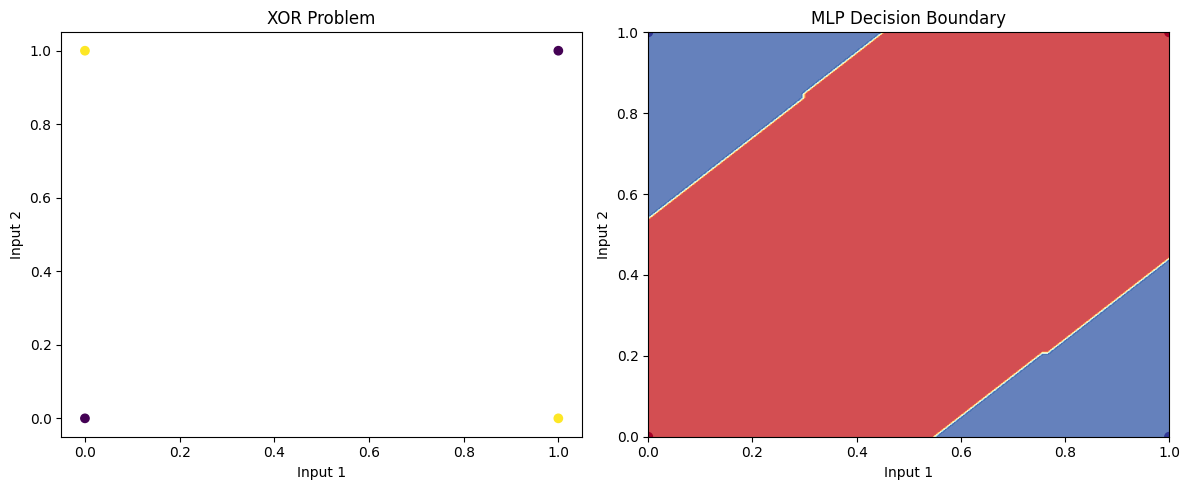

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("XOR Problem")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

plt.subplot(122)
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict_mlp(X_grid, W1, b1, W2, b2).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("MLP Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

plt.tight_layout()
plt.show()

# Question 2 :

* You are tasked with performing sentiment analysis on the IMDb movie review dataset using
an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive
or negative.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* **Load the Dataset**

In [22]:
data = pd.read_csv('/content/IMDBDataset.csv')
print (data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


* **EDA**

In [23]:
# Exploratory Data Analysis (EDA)
print(data.head())
print(data['sentiment'].value_counts(normalize=True))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64


In [24]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49581         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


* Trimming the dataset to 2000 values

In [25]:
data = data.sample(n=2000, random_state=42)

* **Converting the sentiments to binary**

In [26]:
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})
print(data.head())


                                                  review  sentiment
33553  I really liked this Summerslam due to the look...          1
9427   Not many television shows appeal to quite as m...          1
199    The film quickly gets to a major chase scene w...          0
12447  Jane Austen would definitely approve of this o...          1
39489  Expectations were somewhat high for me when I ...          0


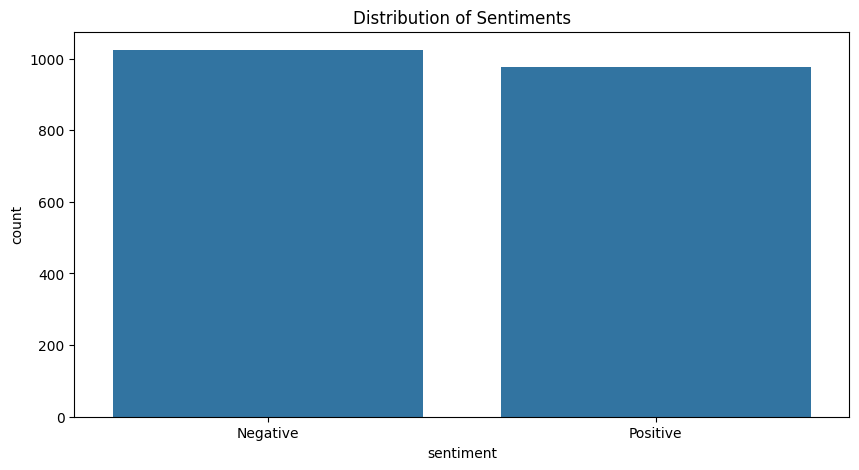

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

* **Preprocessing the text.**

In [29]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to reviews
data['processed_review'] = data['review'].apply(preprocess_text)
print(data.head())

                                                  review  sentiment  \
33553  I really liked this Summerslam due to the look...          1   
9427   Not many television shows appeal to quite as m...          1   
199    The film quickly gets to a major chase scene w...          0   
12447  Jane Austen would definitely approve of this o...          1   
39489  Expectations were somewhat high for me when I ...          0   

                                        processed_review  
33553  really liked summerslam due look arena curtain...  
9427   many television show appeal quite many differe...  
199    film quickly get major chase scene ever increa...  
12447  jane austen would definitely approve onegwynet...  
39489  expectation somewhat high went see movie thoug...  


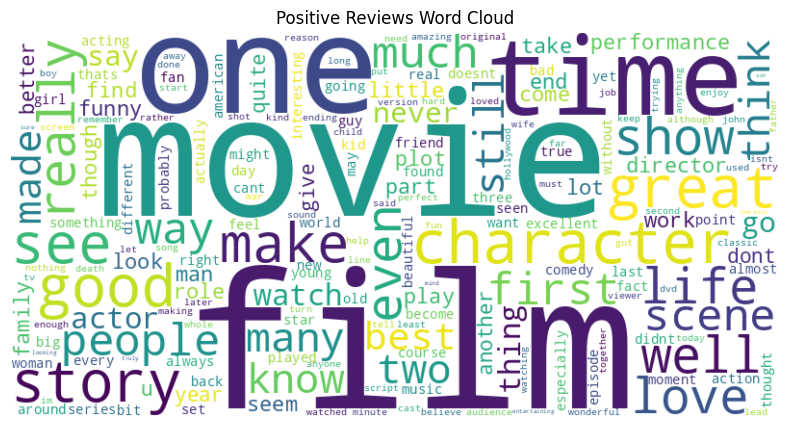

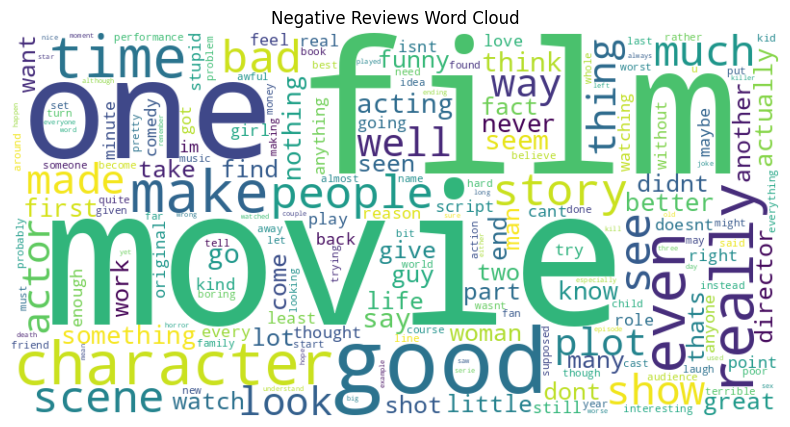

In [30]:
# Word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(data[data['sentiment'] == 1]['processed_review']), 'Positive Reviews Word Cloud')
plot_wordcloud(' '.join(data[data['sentiment'] == 0]['processed_review']), 'Negative Reviews Word Cloud')

In [31]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_review']).toarray()
y = data['sentiment'].values

* **Split the dataset**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1600, 5000)
X_test shape: (400, 5000)
y_train shape: (1600,)
y_test shape: (400,)


* **Building the model**

In [35]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320064    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322177 (1.23 MB)
Trainable params: 322177 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Training the model**

In [36]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/20
40/40 [==============================] - 1s 11ms/step - loss: 0.6897 - accuracy: 0.5461 - val_loss: 0.6847 - val_accuracy: 0.6250
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.7063 - val_loss: 0.6333 - val_accuracy: 0.7125
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.8516 - val_loss: 0.5038 - val_accuracy: 0.8062
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.9273 - val_loss: 0.4336 - val_accuracy: 0.8000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1784 - accuracy: 0.9727 - val_loss: 0.4038 - val_accuracy: 0.7969
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9836 - val_loss: 0.3915 - val_accuracy: 0.8469
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9922 - val_loss: 0.4436 - val_accuracy: 0.8031
Epoch 8/20
40/40 [=

* **Plotting the accuracy and Loss.**

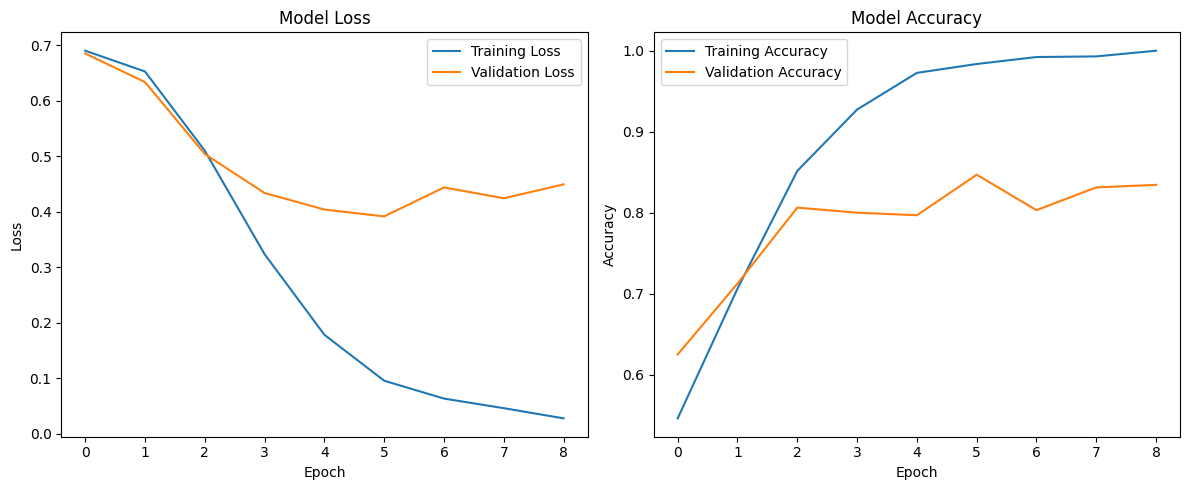

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* **Predicting the test set.**

In [38]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 2ms/step


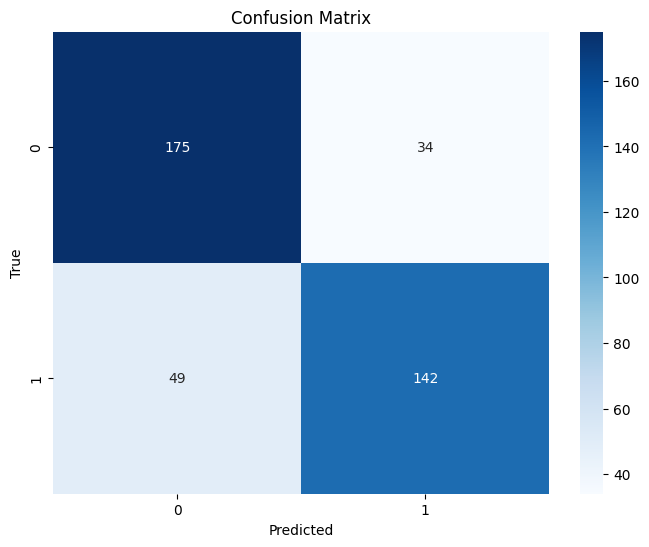

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       209
           1       0.81      0.74      0.77       191

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))

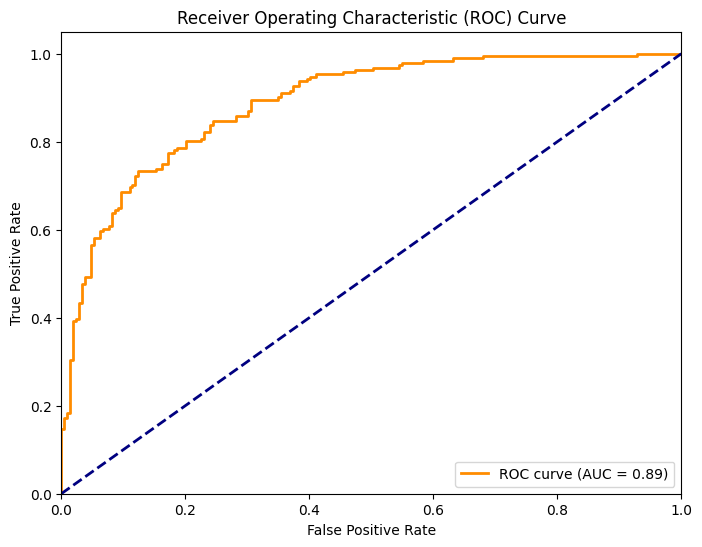

In [40]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
def predict_sentiment(review, model, vectorizer):
    processed_review = preprocess_text(review)
    review_vector = vectorizer.transform([processed_review]).toarray()
    prediction = model.predict(review_vector)
    return "Positive" if prediction > 0.5 else "Negative"

# Example usage
sample_review = "This movie was absolutely fantastic! I loved every minute of it."
print(f"Sample review: {sample_review}")
print(f"Predicted sentiment: {predict_sentiment(sample_review, model, vectorizer)}")

Sample review: This movie was absolutely fantastic! I loved every minute of it.
1/1 [==============================] - 0s 24ms/step
Predicted sentiment: Positive
